In [121]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import pandas as pd
import os

In [22]:
np.random.seed(1)

points = np.round(np.random.normal(loc=82, scale=10, size = 47),3)
points[points>100]=100
points = np.append(points,[45,51,67])
students = points

c:\Users\bpei\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


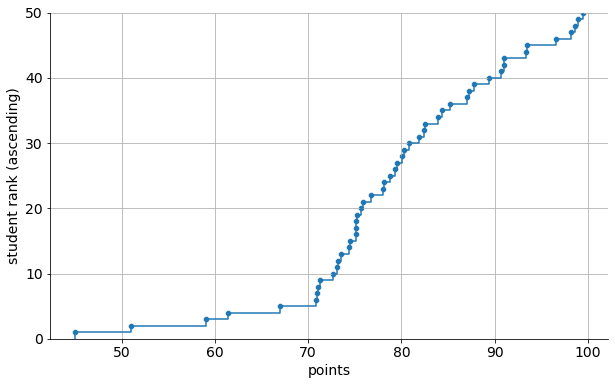

In [51]:
fig, ax = plt.subplots(1,1,figsize = (10,6))
axes = sns.ecdfplot(data= students,
                    stat='count')
sns.scatterplot(np.sort(students),np.arange(1,51))
ax.spines[:].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.grid()
ax.tick_params(axis='both', which = 'major', labelsize = 14)
ax.set_ylabel('student rank (ascending)', fontsize = 14)
ax.set_xlabel('points', fontsize = 14)
plt.show()

c:\Users\bpei\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


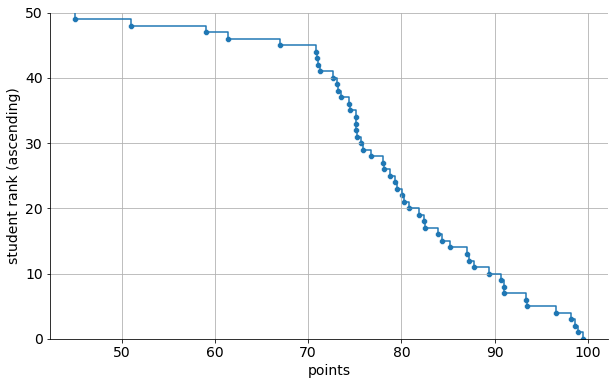

In [68]:
fig, ax = plt.subplots(1,1,figsize = (10,6))
axes = sns.ecdfplot(data= students,
                    stat='count',
                    complementary=True)
sns.scatterplot(np.sort(students)[::-1],np.arange(1,51)-1)
ax.spines[:].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.grid()
ax.tick_params(axis='both', which = 'major', labelsize = 14)
ax.set_ylabel('student rank (ascending)', fontsize = 14)
ax.set_xlabel('points', fontsize = 14)
plt.show()

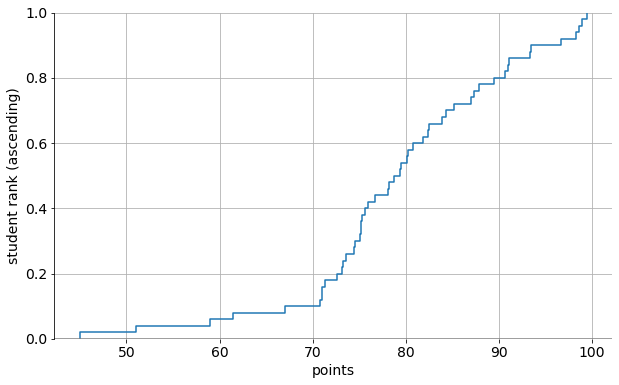

In [77]:
fig, ax = plt.subplots(1,1,figsize = (10,6))
axes = sns.ecdfplot(data= students,
                    stat='proportion')
# sns.scatterplot(np.sort(students),np.arange(1,51))
ax.spines[:].set_visible(False)
# ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.axhline(y=0, color ='gray')
# ax.axvline(x=40, color ='gray')
ax.grid()
ax.tick_params(axis='both', which = 'major', labelsize = 14)
ax.set_ylabel('student rank (ascending)', fontsize = 14)
ax.set_xlabel('points', fontsize = 14)
plt.show()

### 8.2 Highly skewed distributions

In [83]:
US_census = pd.read_csv(os.path.join('data','US_census.csv'))

<AxesSubplot:xlabel='pop2010', ylabel='Density'>

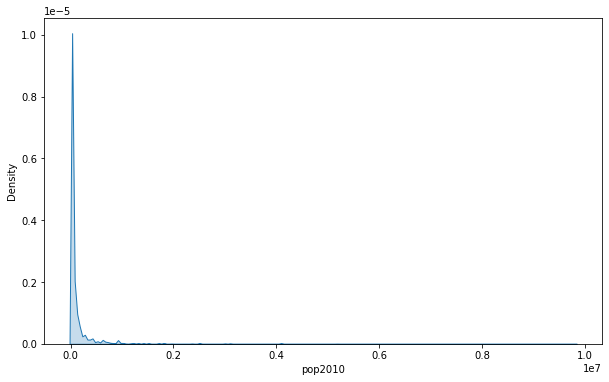

In [104]:
fig, ax = plt.subplots(1,1,figsize = (10,6))
sns.kdeplot(US_census['pop2010'],bw_adjust=.1,fill=True)

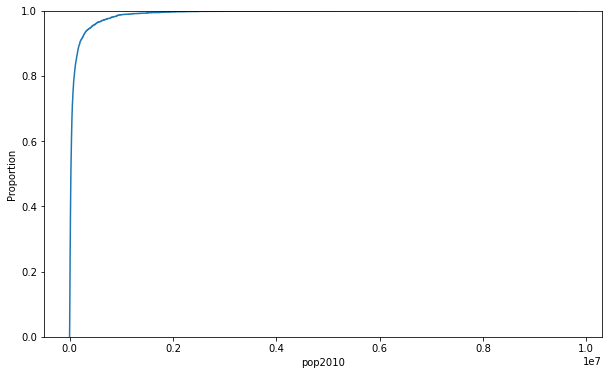

In [109]:
fig, ax = plt.subplots(1,1,figsize = (10,6))
axes = sns.ecdfplot(data= US_census['pop2010'],
                    stat="proportion")

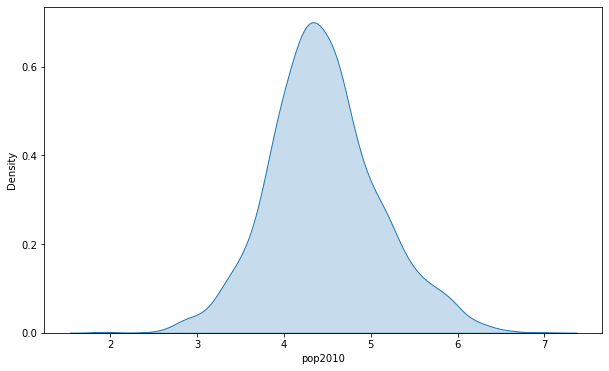

In [122]:
fig, ax = plt.subplots(1,1,figsize = (10,6))
sns.kdeplot(np.log10(US_census['pop2010']),
            bw_adjust=1,
            fill=True)
ax.yaxis.set_major_locator(ticker.MultipleLocator(.2))


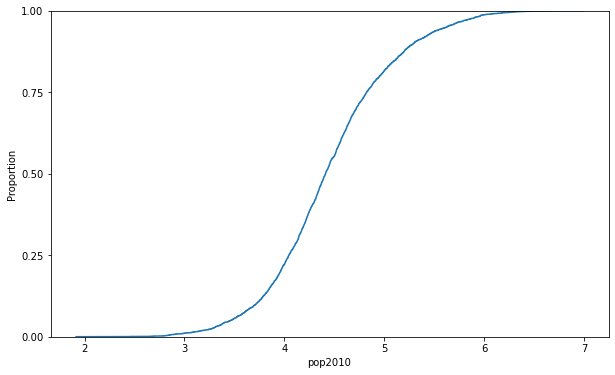

In [125]:
fig, ax = plt.subplots(1,1,figsize = (10,6))
sns.ecdfplot(np.log10(US_census['pop2010']))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))

(100, 10000000)

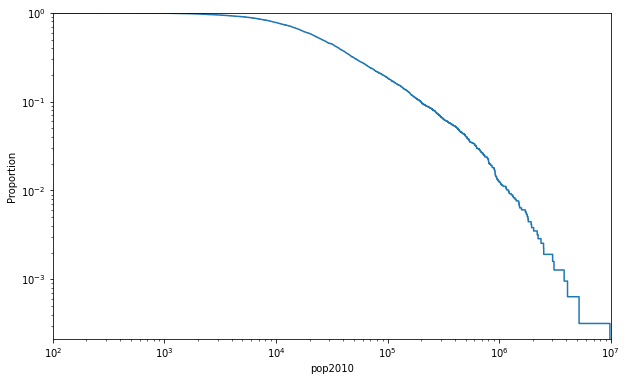

In [133]:
fig, ax = plt.subplots(1,1,figsize = (10,6))
sns.ecdfplot(
    US_census['pop2010'],
    # log_scale=True,
    complementary=True
)
plt.xscale('log')
plt.yscale('log')
ax.set_xlim([np.power(10,2),np.power(10,7)])

In [140]:
moby_dick = pd.read_csv(os.path.join('Data','moby_dick.csv'))

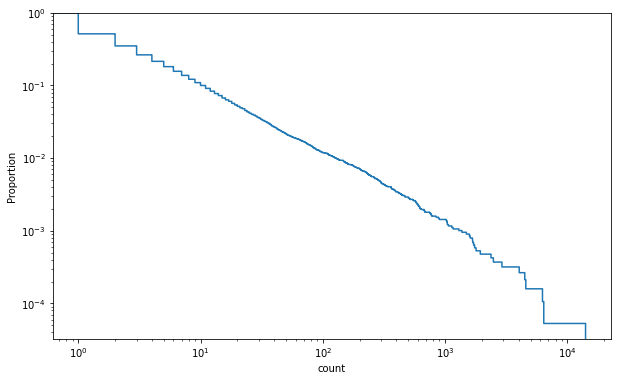

In [146]:
fig, ax = plt.subplots(1,1,figsize = (10,6))
sns.ecdfplot(
    moby_dick['count'],
    stat="proportion",
    complementary=True
)
plt.xscale('log')
plt.yscale('log')

### 8.3 Quantile-quantile Plots

In [165]:
np.random.seed(1)
norm_num = np.random.normal(loc=10, scale=3, size = 50)
norm_num = pd.DataFrame(norm_num)
norm_num.columns=['values']

In [172]:
# pip install seaborn-qqplot
import statsmodels.api as sm
import scipy.stats as stats
import pylab

[]

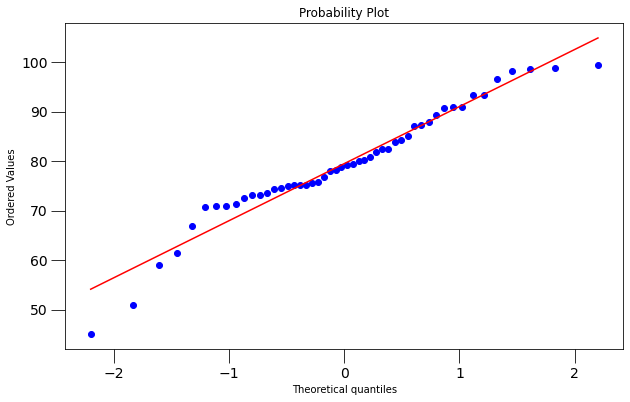

In [187]:
fig, ax = plt.subplots(1,1,figsize = (10, 6))
stats.probplot(students, dist="norm",plot=ax)
ax.tick_params(axis='both', which='major', size =14)
ax.tick_params(axis='both', which='major', labelsize =14)
ax.plot()

[]

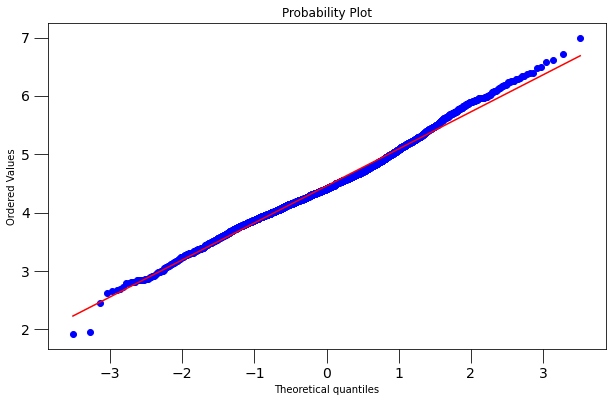

In [188]:
# testing if the country population follows a log-normal distribution
log_transformed = np.log10(US_census['pop2010'])
fig, ax = plt.subplots(1,1,figsize = (10, 6))
stats.probplot(log_transformed, dist="norm",plot=ax)
ax.tick_params(axis='both', which='major', size =14)
ax.tick_params(axis='both', which='major', labelsize =14)
ax.plot()